In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [28]:
ix=[]
N_meas=6
count=0
for i in range(N_meas):
    for j in range(i, N_meas):
        for k in range(j, N_meas):
            if (i>0) and (i<4) and (j>0) and (j<4) and (k>0) and (k<4):
                ix.append(count)
            count+=1

print(ix)

[21, 22, 23, 26, 27, 30, 36, 37, 40, 46]


In [101]:
ssc=np.loadtxt("SSC_cov_square_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
ssc_slics=np.loadtxt("SSC_cov_square_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
T7=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")[10:, 10:]
T1=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")[10:, 10:]
T2=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")[10:, 10:]
T4=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term4Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")[10:, 10:]
T5=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term5Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")[10:, 10:]
T6=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_square_term6Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")[10:, 10:]



ix=[21, 22, 23, 26, 27, 30, 36, 37, 40, 46]
sim=np.load("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/Map_cov_KiDS1000_squarepatches_0.npy")[6:, 6:]

sim=sim[ix,:][:,ix]

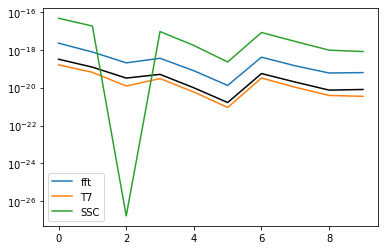

In [48]:
plt.yscale('log')
plt.plot(np.diag(sim), label='fft')
plt.plot(np.diag(T7), label='T7')
#plt.plot(np.diag(T1), label='T1')
plt.plot(np.diag(T1)+np.diag(T7)+np.diag(T2)+np.diag(T4)+np.diag(T5)+np.diag(T6), color='k')
plt.plot(np.diag(ssc), label='SSC')
plt.legend()

In [49]:
dir_takahashi="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/"
N_meas=6
ix=[21, 22, 23, 24, 26, 27, 28, 30, 31, 33, 36, 37, 38, 40, 41, 43, 46, 47, 49, 52]
cov_fft=np.load(dir_takahashi+"Map_cov_KiDS1000_squarepatches_0.npy")[N_meas:, N_meas:]
cov_fft=cov_fft[ix,:][:,ix]
cov_T1inf=np.loadtxt(dir_takahashi+"cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T2=np.loadtxt(dir_takahashi+"cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T4=np.loadtxt(dir_takahashi+"cov_infinite_term4Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T5=np.loadtxt(dir_takahashi+"cov_infinite_term5Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T6=np.loadtxt(dir_takahashi+"cov_square_term6Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T7=np.loadtxt(dir_takahashi+"cov_infinite_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")

Text(19.2, 3e-17, 'T17')

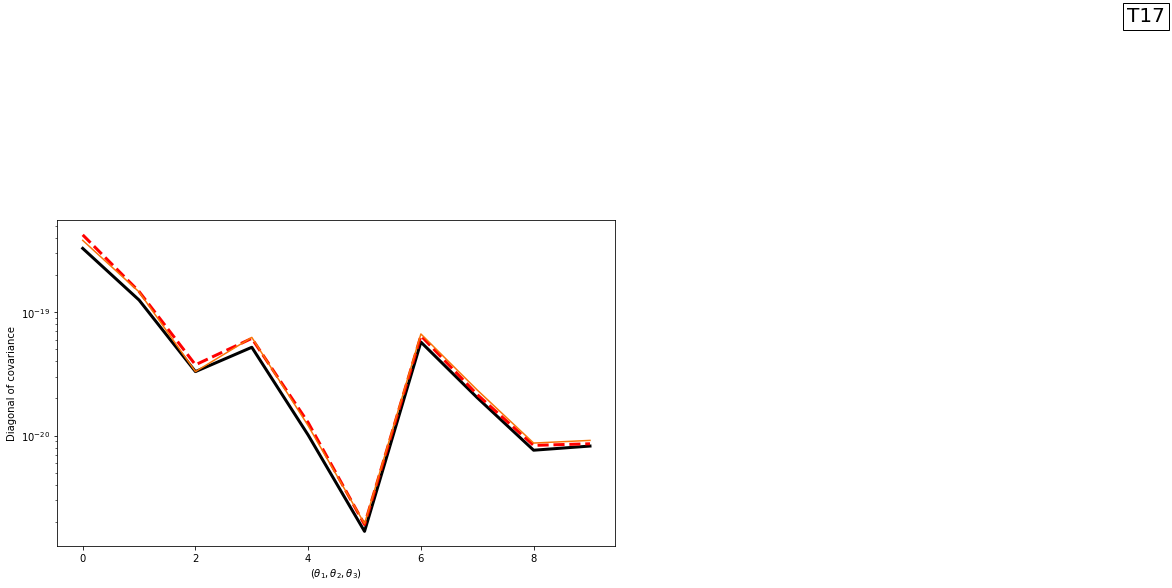

In [133]:
import matplotlib.cm as cm
fig, ax=plt.subplots(figsize=(10,6))

#colors=cm.viridis_r(np.linspace(0.2, 1, 6))
#colors=cm.brg(np.linspace(0, 1, 6))
colors=cm.tab10([0,1,2,4,5,6])


#ax.set_title(r"Diagonal of covariance of $\langle M_\mathrm{ap}^3\rangle$ for SLICS")
ax.set_xlabel(r'$(\theta_1, \theta_2, \theta_3)$')
#ax.set_xticks(thetas_ticks)
#ax.set_xticklabels(thetas_labels, rotation=90)
ax.set_yscale('log')
#ax.set_ylim(1e-25, 5e-18)
ax.set_ylabel("Diagonal of covariance")
N=20
cov_tot=cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7
#ax.plot(np.diag(cov_T1inf[10:,10:]), label=r'$T_{PPP, 1}$', ls='-', color=colors[0])
#ax.plot(np.diag(cov_T2[10:,10:]), label=r'$T_{PPP, 2}$', ls='-', color=colors[1])
#ax.plot(np.diag(cov_T4), label=r'$T_{BB}$', ls='-', color=colors[2])
#ax.plot(np.diag(cov_T5), label=r'$T_{PT, 1}$', ls='-', color=colors[3])
#ax.plot(np.diag(cov_T6), label=r'$T_{PT, 2}$', ls='-', color=colors[4])
#ax.plot(np.diag(cov_T7[10:,10:]), label=r'$T_{{P_6}}$', ls='-', color=colors[5])
ax.plot(np.diag(cov_tot[10:,10:]), label=r'$C_{\hat{M}_\mathrm{ap}^3}$', color='k', lw=3)
ax.plot(np.diag(cov_fft[10:,10:]), label=r'$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{sim}$', color='red', ls='--', lw=3)
ax.plot(np.diag(ssc)/248/3.7+np.diag(cov_tot[10:,10:]), color='xkcd:orange')
ax.text(N-0.8, 3e-17, r"T17", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=20)

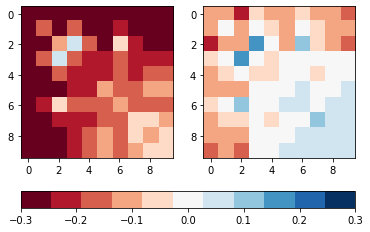

In [134]:
fig, axs=plt.subplots(ncols=2)

cmap=cm.get_cmap('RdBu', 11)
vmin=-0.3
vmax=0.3
norm=248*3.7
axs[0].imshow(2*(cov_tot[10:,10:]-cov_fft[10:,10:])/(cov_tot[10:,10:]+cov_fft[10:,10:]), cmap=cmap, vmin=vmin, vmax=vmax)
im=axs[1].imshow(2*(cov_tot[10:,10:]+ssc/norm-cov_fft[10:,10:])/(cov_tot[10:,10:]+ssc/norm+cov_fft[10:,10:]), cmap=cmap, vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axs.ravel(), orientation="horizontal")



In [22]:
sim=sim[15:, 15:]

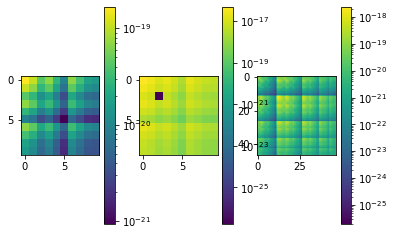

In [23]:
fig, ax=plt.subplots(ncols=3)
im=ax[0].imshow(T7, norm=LogNorm())
fig.colorbar(im, ax=ax[0])
im=ax[1].imshow(ssc, norm=LogNorm())
fig.colorbar(im, ax=ax[1])
im=ax[2].imshow(sim, norm=LogNorm())
fig.colorbar(im, ax=ax[2])



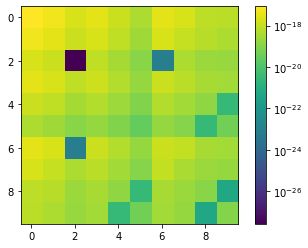

In [106]:
plt.imshow(ssc_slics/61.93, norm=LogNorm())
plt.colorbar()

In [113]:
T7_slics=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/cov_infinite_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
T5_slics=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

fft_slics=np.load("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/map_cubed.npy")
fft_slics=np.cov(fft_slics)

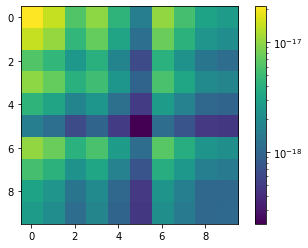

In [114]:
plt.imshow(T7_slics+T5_slics, norm=LogNorm())
plt.colorbar()

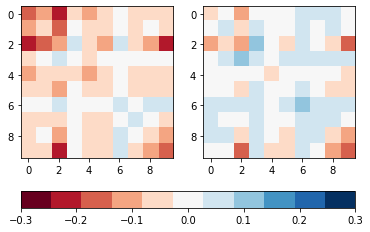

In [128]:
cmap=cm.get_cmap('RdBu', 11)
vmin=-0.3
vmax=0.3

norm=248

fig, axs=plt.subplots(ncols=2)
im=axs[0].imshow(2*(T7_slics+T5_slics-fft_slics)/(T7_slics+T5_slics+fft_slics), cmap=cmap, vmin=vmin, vmax=vmax)
im=axs[1].imshow(2*(T7_slics+T5_slics+ssc_slics/norm-fft_slics)/(T7_slics+T5_slics+ssc_slics/norm+fft_slics), cmap=cmap, vmin=vmin, vmax=vmax)


plt.colorbar(im,orientation="horizontal", ax=axs)


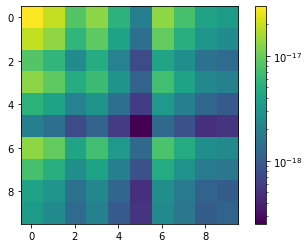

In [115]:
plt.imshow(T7_slics+T5_slics+ssc_slics/61.93, norm=LogNorm())
plt.colorbar()

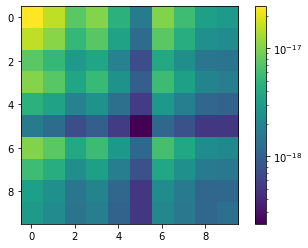

In [111]:
plt.imshow(fft_slics, norm=LogNorm())
plt.colorbar()